In [3]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from pathlib import Path

In [ ]:




import pandas as pd


files = ['/content/OSMI 2020 Mental Health in Tech Survey Results .csv', '/content/OSMI 2021 Mental Health in Tech Survey Results .csv', '/content/responses.csv', '/content/responses_2021.csv']


columns_to_keep = [
    #'Are you self-employed?',
    'Is your primary role within your company related to tech/IT?',
    'Have you ever discussed your mental health with your employer?',
    'Would you feel comfortable discussing a mental health issue with your coworkers?',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?',
    'If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?',
    'Do you *currently* have a mental health disorder?',
    'Have you ever been *diagnosed* with a mental health disorder?',
    'Anxiety Disorder (Generalized, Social, Phobia, etc)',
    'Mood Disorder (Depression, Bipolar Disorder, etc)',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)',
    'Eating Disorder (Anorexia, Bulimia, etc)',
    'Attention Deficit Hyperactivity Disorder',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc)',
    'Obsessive-Compulsive Disorder',
    'Post-Traumatic Stress Disorder',
    'Stress Response Syndromes',
    'Dissociative Disorder',
    'Substance Use Disorder',
    'Addictive Disorder',
    'Other',
    'How willing would you be to share with friends and family that you have a mental illness?',
    'Would you bring up your *mental* health with a potential employer in an interview?',
    'What is your age?',
    'What is your gender?',
    'What country do you *live* in?',
    'What is your race?',
    'What country do you *work* in?',
    "Submit Date (UTC)"
]

# Read and merge the files
merged_df = pd.concat((pd.read_csv(file) for file in files), ignore_index=True)
filtered_df = merged_df[columns_to_keep]
filtered_df=filtered_df.dropna(how='all')
filtered_df = filtered_df[filtered_df['Is your primary role within your company related to tech/IT?'] == 1]
filtered_df.to_csv('merged_filtered_data3.csv', index=False)
print(filtered_df.head())

files = ['/content/OSMI 2020 Mental Health in Tech Survey Results .csv', '/content/OSMI 2021 Mental Health in Tech Survey Results .csv', '/content/responses.csv', '/content/responses_2021.csv']



    Is your primary role within your company related to tech/IT?  \
25                                                1.0              
26                                                1.0              
27                                                1.0              
28                                                1.0              
29                                                1.0              

    Have you ever discussed your mental health with your employer?  \
25                                                0.0                
26                                                0.0                
27                                                0.0                
28                                                1.0                
29                                                0.0                

   Would you feel comfortable discussing a mental health issue with your coworkers?  \
25                                              Maybe                              

In [4]:
# Save path to the data set as a variable.
data_file = Path("/content/merged_filtered_data3.csv")
# Use Pandas to the read data.
data_file_df = pd.read_csv(data_file)
data_file_df.head()

,Is your primary role within your company related to tech/IT?,Have you ever discussed your mental health with your employer?,Would you feel comfortable discussing a mental health issue with your coworkers?,"If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to clients or business contacts?","If you have been diagnosed or treated for a mental health disorder, do you ever reveal this to coworkers or employees?",Do you *currently* have a mental health disorder?,Have you ever been *diagnosed* with a mental health disorder?,"Anxiety Disorder (Generalized, Social, Phobia, etc)","Mood Disorder (Depression, Bipolar Disorder, etc)","Psychotic Disorder (Schizophrenia, Schizoaffective, etc)",...,Addictive Disorder,Other,How willing would you be to share with friends and family that you have a mental illness?,Would you bring up your *mental* health with a potential employer in an interview?,What is your age?,What is your gender?,What country do you *live* in?,What is your race?,What country do you *work* in?,Submit Date (UTC)
0,1.0,0.0,Maybe,NaN,NaN,Possibly,NaN,NaN,NaN,NaN,...,NaN,NaN,3,No,26,male,United States of America,White,United States of America,NaN
1,1.0,0.0,Yes,NaN,NaN,Don't Know,NaN,NaN,NaN,NaN,...,NaN,NaN,7,No,32,Male,India,NaN,India,NaN
2,1.0,0.0,No,NaN,NaN,Possibly,NaN,NaN,NaN,NaN,...,NaN,NaN,0,No,34,Male,United States of America,More than one of the above,United States of America,NaN
3,1.0,1.0,Maybe,NaN,NaN,Yes,Yes,NaN,NaN,NaN,...,NaN,NaN,9,No,44,female,United States of America,White,United States of America,NaN
4,1.0,0.0,No,NaN,NaN,Possibly,NaN,NaN,NaN,NaN,...,NaN,NaN,7,No,33,M,India,NaN,India,NaN


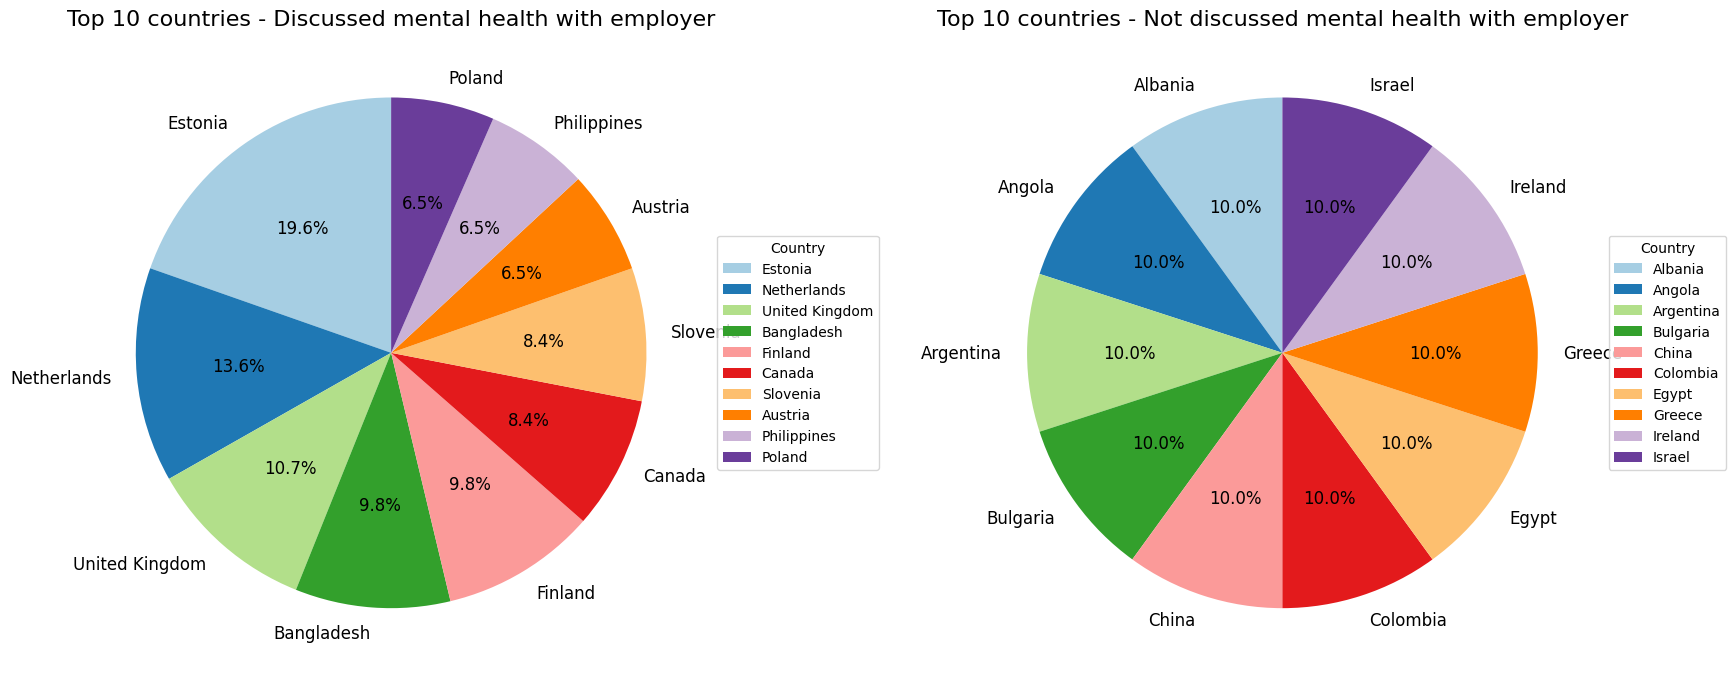

In [ ]:
import matplotlib.pyplot as plt

# Group the data and calculate the size of each group
grouped_data = data_file_df.groupby(['What country do you *work* in?', 'Have you ever discussed your mental health with your employer?']).size().unstack(fill_value=0)

# Calculate percentages
percentage_data = grouped_data.div(grouped_data.sum(axis=1), axis=0) * 100

# Function to filter out 0% slices and select top 10
def filter_top_ten(data):
    filtered_data = data[data > 0]
    return filtered_data.nlargest(10)

fig, axes = plt.subplots(1, 2, figsize=(18, 9))

# Pie chart for 'Yes' (set to 1)
yes_data = filter_top_ten(percentage_data[1])
yes_data.plot.pie(ax=axes[0], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, textprops={'fontsize': 12})
axes[0].set_ylabel('')
axes[0].set_title('Top 10 countries - Discussed mental health with employer', fontsize=16)

# Pie chart for 'No' (set to 0)
no_data = filter_top_ten(percentage_data[0])
no_data.plot.pie(ax=axes[1], autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors, textprops={'fontsize': 12})
axes[1].set_ylabel('')
axes[1].set_title('Top 10 countries - Not discussed mental health with employer', fontsize=16)

# general plot things
for ax in axes:
    ax.legend(loc="center left", bbox_to_anchor=(1, 0.5), title="Country", fontsize='medium')
plt.tight_layout(pad=3.0)
plt.show()


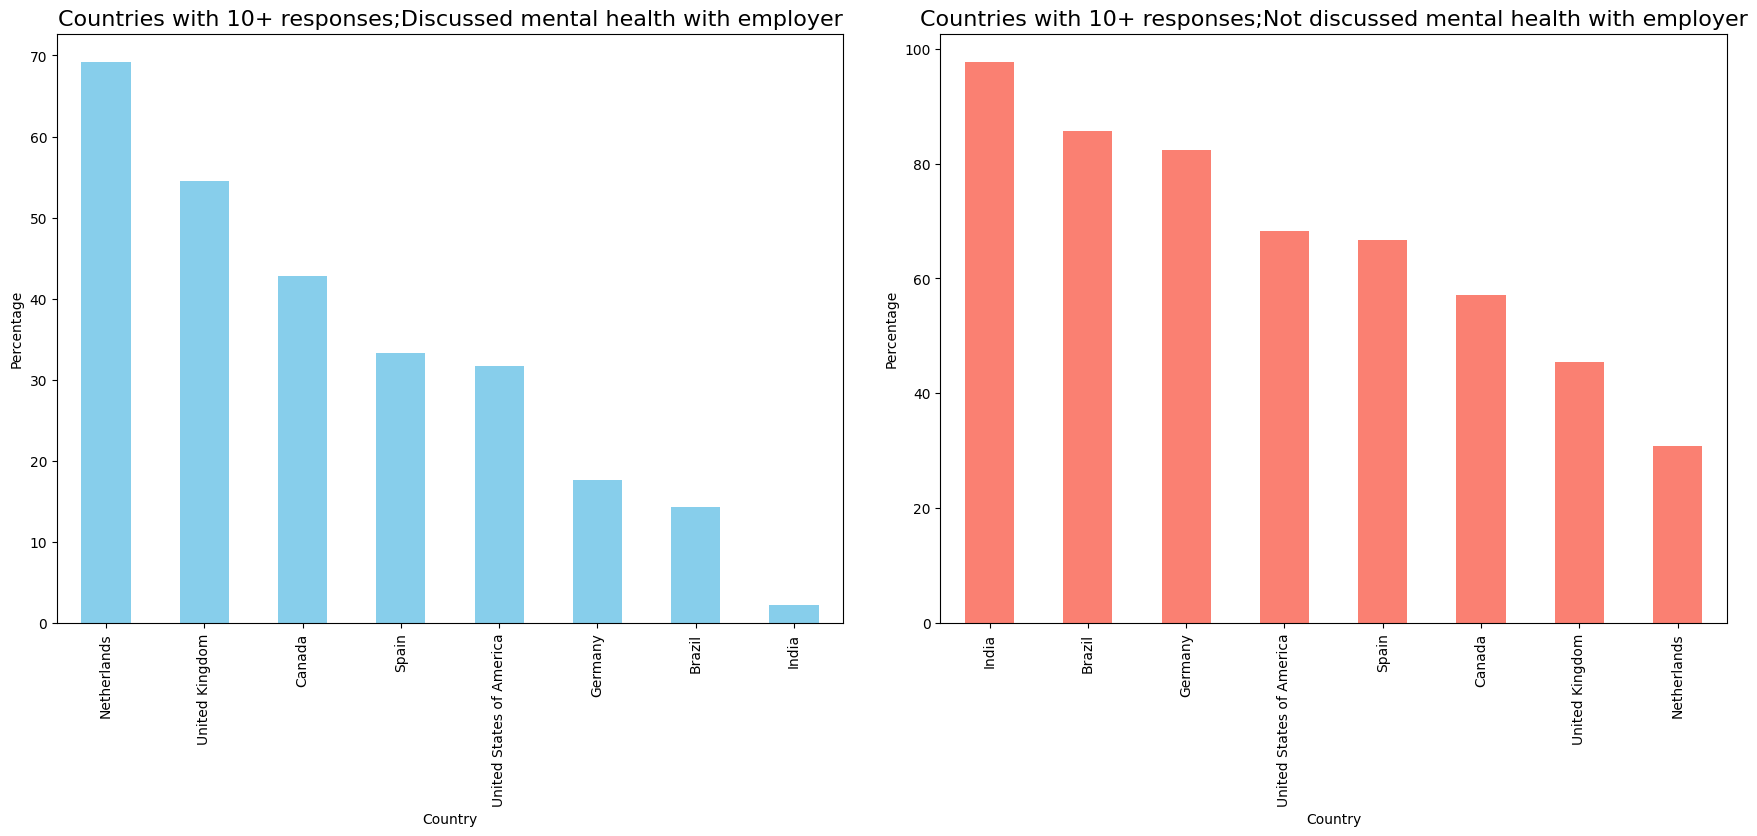

In [ ]:
import matplotlib.pyplot as plt
#basically same as above but bar graphs
grouped_data = data_file_df.groupby(['What country do you *work* in?', 'Have you ever discussed your mental health with your employer?']).size().unstack(fill_value=0)


filtered_data = grouped_data[grouped_data.sum(axis=1) >= 10]
percentage_data = filtered_data.div(filtered_data.sum(axis=1), axis=0) * 100


def filter_top_ten(data):
    return data.nlargest(10)

top_yes = filter_top_ten(percentage_data[1])
top_no = filter_top_ten(percentage_data[0])

# Plots
fig, axes = plt.subplots(1, 2, figsize=(18, 9))  # Increase figure size
top_yes.plot.bar(ax=axes[0], color='skyblue')
axes[0].set_ylabel('Percentage')
axes[0].set_title('Countries with 10+ responses;Discussed mental health with employer', fontsize=16)
axes[0].set_xlabel('Country')
top_no.plot.bar(ax=axes[1], color='salmon')
axes[1].set_ylabel('Percentage')
axes[1].set_title('Countries with 10+ responses;Not discussed mental health with employer', fontsize=16)
axes[1].set_xlabel('Country')
plt.tight_layout(pad=3.0)
plt.show()


<Figure size 1200x800 with 0 Axes>

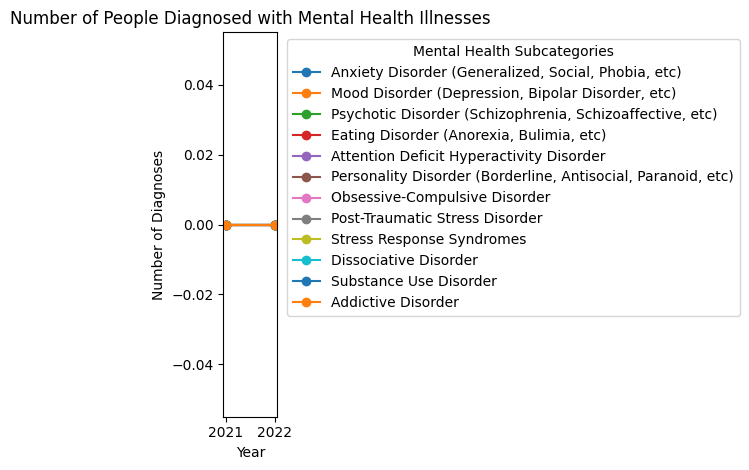

In [ ]:

#sort the data by year
data_file_df['Year'] = pd.to_datetime(data_file_df['Submit Date (UTC)']).dt.year

# List of mental health disorders to track
mental_health_columns = [
    'Anxiety Disorder (Generalized, Social, Phobia, etc)',
    'Mood Disorder (Depression, Bipolar Disorder, etc)',
    'Psychotic Disorder (Schizophrenia, Schizoaffective, etc)',
    'Eating Disorder (Anorexia, Bulimia, etc)',
    'Attention Deficit Hyperactivity Disorder',
    'Personality Disorder (Borderline, Antisocial, Paranoid, etc)',
    'Obsessive-Compulsive Disorder',
    'Post-Traumatic Stress Disorder',
    'Stress Response Syndromes',
    'Dissociative Disorder',
    'Substance Use Disorder',
    'Addictive Disorder'
]

# Function to group data by year and sum up the number of diagnoses
def group_by_year_and_count(df):
    return df.groupby('Year')[mental_health_columns].sum()

grouped_data = group_by_year_and_count(data_file_df)

# Plot
plt.figure(figsize=(12, 8))
grouped_data.plot(marker='o')
plt.title('Number of People Diagnosed with Mental Health Illnesses')
plt.ylabel('Number of Diagnoses')
plt.xlabel('Year')
plt.legend(title='Mental Health Subcategories', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()
#code here not used for presentation


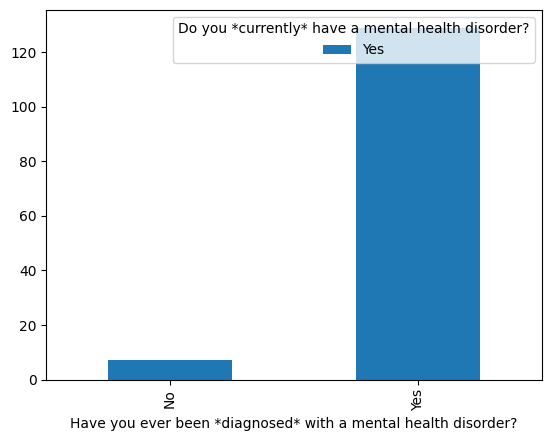

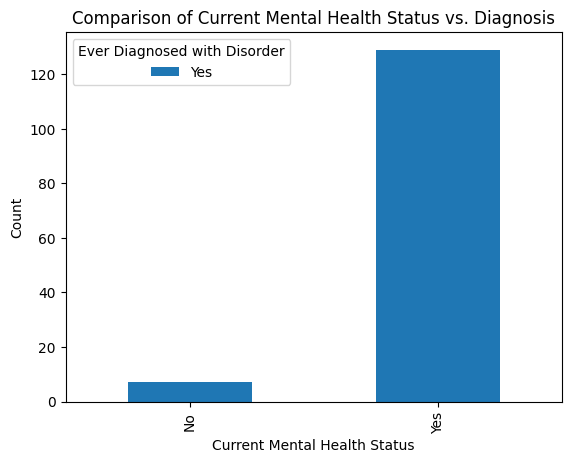

In [5]:
crosstab = pd.crosstab(data_file_df["Have you ever been *diagnosed* with a mental health disorder?"], data_file_df["Do you *currently* have a mental health disorder?"])
#for stacked plots
crosstab.plot(kind='bar', stacked=True)

crosstab.plot(kind='bar')
plt.title('Comparison of Current Mental Health Status vs. Diagnosis')
plt.xlabel('Current Mental Health Status')
plt.ylabel('Count')
plt.legend(title='Ever Diagnosed with Disorder')
plt.show()

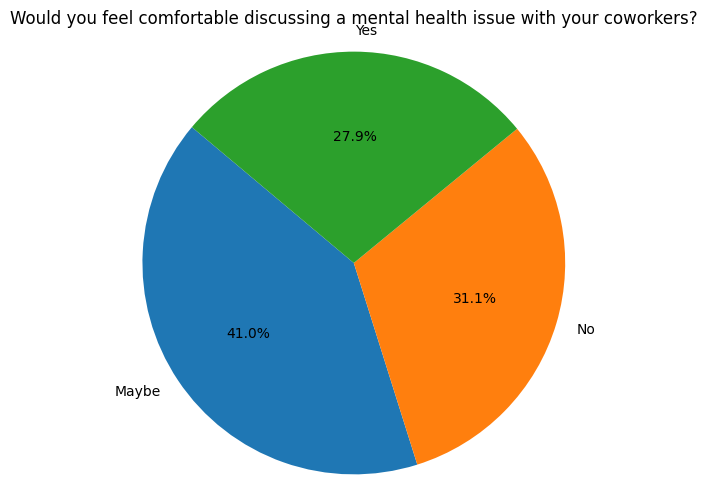

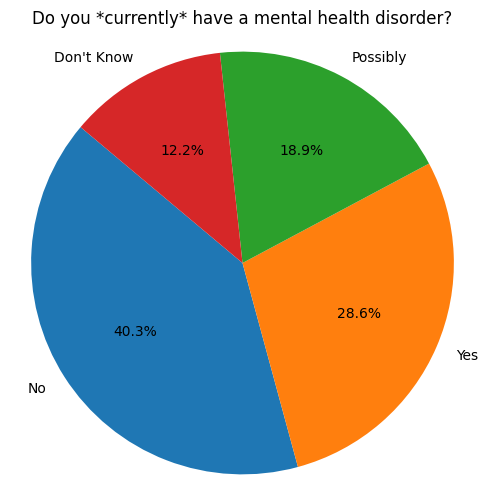

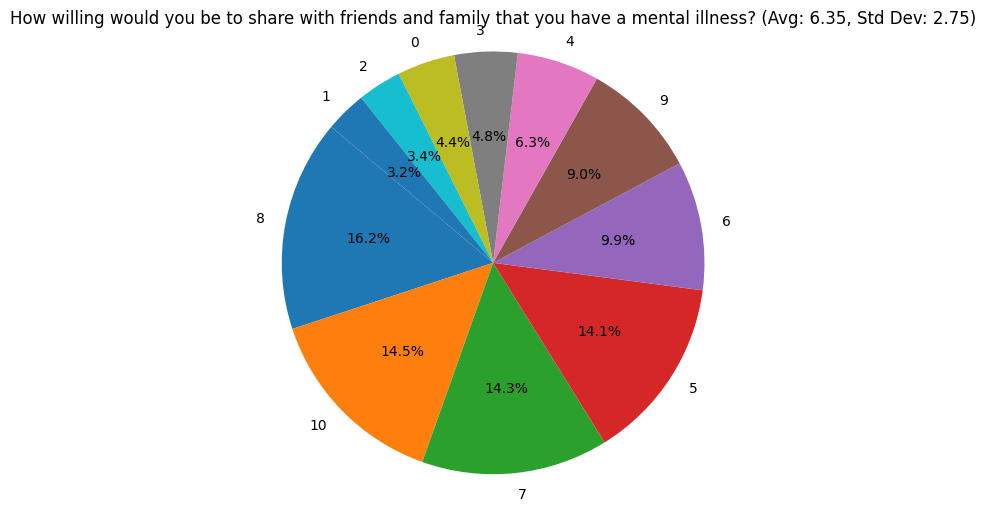

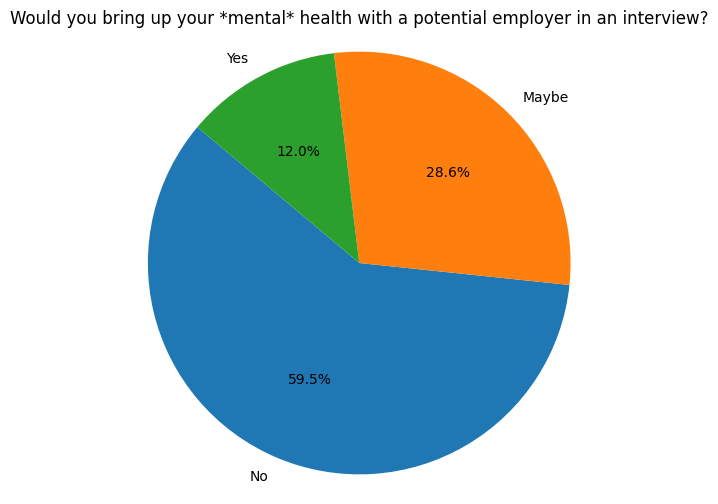

In [ ]:
#Mirceas plots, plus some neat stats to go with them.
#here I created a loop for all the questions that have 10 or less types of answer
#I will plot a pie chart related to each question
questions_to_chart = [2,5,20,21]

for curent_question in questions_to_chart:
    question = data_file_df.iloc[:, curent_question]
    response_counts = question.value_counts()
    column_name = data_file_df.columns

    if curent_question == 20:
        average_score = question.mean()
        std_deviation = question.std()
        title = f"{column_name[curent_question]} (Avg: {average_score:.2f}, Std Dev: {std_deviation:.2f})"
    else:
        title = column_name[curent_question]

    # Create the pie chart
    plt.figure(figsize=(6, 6))
    plt.pie(response_counts, labels=response_counts.index, autopct='%1.1f%%', startangle=140)
    plt.title(title)
    plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
    plt.show()

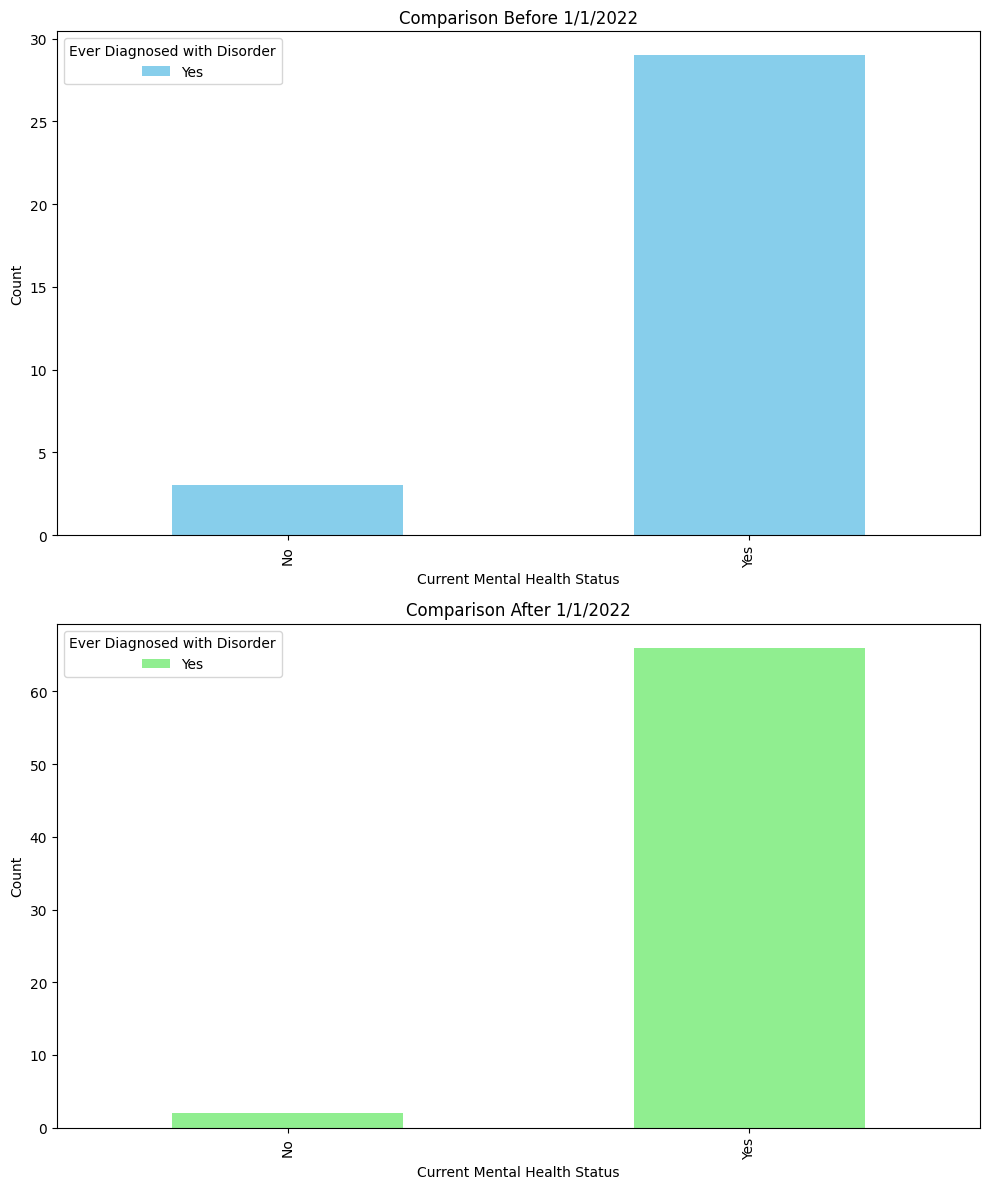

In [ ]:


# Ensure the 'Submit Date (UTC)' column is in datetime format
data_file_df['Submit Date (UTC)'] = pd.to_datetime(data_file_df['Submit Date (UTC)'])

# Splitting the data into two based on the date 1/1/2022
before_march_2020 = data_file_df[data_file_df['Submit Date (UTC)'] < '2022-01-01']
after_march_2020 = data_file_df[data_file_df['Submit Date (UTC)'] >= '2022-01-01']

#plots
crosstab_before = pd.crosstab(before_march_2020["Have you ever been *diagnosed* with a mental health disorder?"],
                              before_march_2020["Do you *currently* have a mental health disorder?"])

crosstab_after = pd.crosstab(after_march_2020["Have you ever been *diagnosed* with a mental health disorder?"],
                             after_march_2020["Do you *currently* have a mental health disorder?"])
fig, axs = plt.subplots(2, 1, figsize=(10, 12))
crosstab_before = crosstab_before.astype(int)
crosstab_before.plot(kind='bar', stacked=True, ax=axs[0], color=['skyblue', 'salmon'])
axs[0].set_title('Comparison Before 1/1/2022')
axs[0].set_xlabel('Current Mental Health Status')
axs[0].set_ylabel('Count')
axs[0].legend(title='Ever Diagnosed with Disorder')
crosstab_after = crosstab_after.astype(int)
crosstab_after.plot(kind='bar', stacked=True, ax=axs[1], color=['lightgreen', 'lightcoral'])
axs[1].set_title('Comparison After 1/1/2022')
axs[1].set_xlabel('Current Mental Health Status')
axs[1].set_ylabel('Count')
axs[1].legend(title='Ever Diagnosed with Disorder')
plt.tight_layout()
plt.show()

In [6]:
# getting the total number of respondants
data_file_df["Submit Date (UTC)"] = pd.to_datetime(data_file_df["Submit Date (UTC)"])
before_2022 = data_file_df[data_file_df["Submit Date (UTC)"] < "2022-01-01"]
after_2022 = data_file_df[data_file_df["Submit Date (UTC)"] >= "2022-01-01"]
total_respondents_before_2022 = len(before_2022)
total_respondents_after_2022 = len(after_2022)
print("Total number of respondents before 1/1/2022:", total_respondents_before_2022)
print("Total number of respondents on or after 1/1/2022:", total_respondents_after_2022)

Total number of respondents before 1/1/2022: 99
Total number of respondents on or after 1/1/2022: 236
